In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib
import numpy as np

In [0]:
import matplotlib.pyplot as plt

# Load dataset

In [3]:
dataset = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
(X_train, y_train), (X_test, y_test) = dataset
X_train = np.asarray( X_train, dtype=np.float32 )
X_test = np.asarray( X_test, dtype=np.float32 )

y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

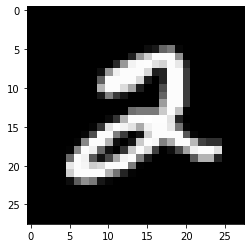

In [5]:
plt.imshow( X_train[5] , cmap='gray')

# Sequential model

## 1. Build model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

In [7]:
# MLP ( 100, 50, 10 )
model = Sequential()
model.add( Flatten(input_shape=(28,28)) )

model.add( Dense(100, activation='tanh', use_bias=True) )
model.add( Dense(50,  activation='tanh', use_bias=True) )
model.add( Dense(10, use_bias=True) )
model.add( Activation('softmax') )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [0]:
predict = model.predict( X_train[:20] )

In [9]:
predict.shape

(20, 10)

In [10]:
model.layers

## 2. Compile model

In [0]:
my_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [12]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.02264171, -0.07060239, -0.02637088, ..., -0.00623789,
          0.00167646,  0.03816877],
        [ 0.01904366, -0.01255775, -0.01401481, ..., -0.05426856,
          0.04898049,  0.01373756],
        [ 0.00811911,  0.07774569, -0.0564224 , ..., -0.0739712 ,
         -0.02936947,  0.08066387],
        ...,
        [-0.0359856 ,  0.00601424,  0.00943413, ..., -0.00023755,
         -0.05988616, -0.06644253],
        [-0.06695645, -0.05126549, -0.06417963, ..., -0.07697871,
          0.02144711,  0.02143729],
        [ 0.0017382 ,  0.05226472, -0.04135923, ...,  0.0631866 ,
          0.05687475,  0.05991507]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [0]:
model.compile( optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'] )

In [14]:
model.predict(X_train)

array([[0.1803823 , 0.03216615, 0.14930001, ..., 0.01985048, 0.17018619,
        0.02959492],
       [0.0611337 , 0.048157  , 0.15773731, ..., 0.00672168, 0.25811547,
        0.07350588],
       [0.21928267, 0.11490839, 0.05854972, ..., 0.07455469, 0.04959428,
        0.02779274],
       ...,
       [0.23466045, 0.078926  , 0.23223706, ..., 0.0312376 , 0.06426498,
        0.04059691],
       [0.10078804, 0.14926466, 0.16741557, ..., 0.05822524, 0.12214007,
        0.14672115],
       [0.2103627 , 0.11594614, 0.0963759 , ..., 0.10603746, 0.09538163,
        0.01561185]], dtype=float32)

In [15]:
# Uwaga: to jeszcze nie to samo, co evaluate
tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( y_train_one_hot, model.predict(X_train, ) ) )

<tf.Tensor: shape=(), dtype=float32, numpy=2.305234>

## Train model

In [0]:
model.fit( X_train, y_train_one_hot, batch_size=16, epochs=5 )

Epoch 1/5
3750/3750 - 10s - loss: 0.3579 - categorical_accuracy: 0.8962
Epoch 2/5
3750/3750 - 10s - loss: 0.3295 - categorical_accuracy: 0.9014
Epoch 3/5
3750/3750 - 10s - loss: 0.3061 - categorical_accuracy: 0.9095
Epoch 4/5
3750/3750 - 10s - loss: 0.2907 - categorical_accuracy: 0.9141
Epoch 5/5
3750/3750 - 10s - loss: 0.2872 - categorical_accuracy: 0.9146


In [0]:
history

## Evaluate model

In [20]:
# Loss
model.evaluate( X_train, y_train_one_hot, batch_size=60000 )

1/1 [==============================] - 0s 1ms/step - loss: 2.5835 - categorical_accuracy: 0.1053


[2.5835390090942383, 0.10526666790246964]

In [25]:
tf.reduce_mean( tf.losses.categorical_crossentropy(y_train_one_hot, model.predict(X_train, verbose=0)) )

<tf.Tensor: shape=(), dtype=float32, numpy=2.583539>

In [22]:
model.evaluate( X_test, y_test_one_hot, batch_size=60000 )

1/1 [==============================] - 0s 2ms/step - loss: 2.5807 - categorical_accuracy: 0.1027


[2.5806643962860107, 0.10270000249147415]

### Model surgery

In [0]:
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[3].output)

logits = model2.predict(X_train)

In [30]:
tf.reduce_mean( tf.losses.categorical_crossentropy(y_train_one_hot, logits, from_logits=True) )

<tf.Tensor: shape=(), dtype=float32, numpy=2.583539>

In [31]:
tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(y_train_one_hot, logits) )

<tf.Tensor: shape=(), dtype=float32, numpy=2.583539>

In [0]:
import tensorflow_datasets as tfds

In [0]:
dataset = tfds.image.Beans()

In [0]:
dataset.download_and_prepare()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete6VS5MR/beans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete6VS5MR/beans-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete6VS5MR/beans-test.tfrecord


Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [0]:
ds = dataset.as_dataset()

In [0]:
ds

{'test': <DatasetV1Adapter shapes: {image: (500, 500, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <DatasetV1Adapter shapes: {image: (500, 500, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'validation': <DatasetV1Adapter shapes: {image: (500, 500, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [0]:
# for x in ds['test'].as_numpy_iterator():
#   print(x)